# 0. Installing Liberaries

In [1]:
!pip install mediapipe opencv-python


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\dishi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\dishi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\dishi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\dishi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install pandas


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\dishi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# 1. Importing The Liberaries

In [6]:
import cv2
import mediapipe as mp
import numpy as np;import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# 2. Determining Joints

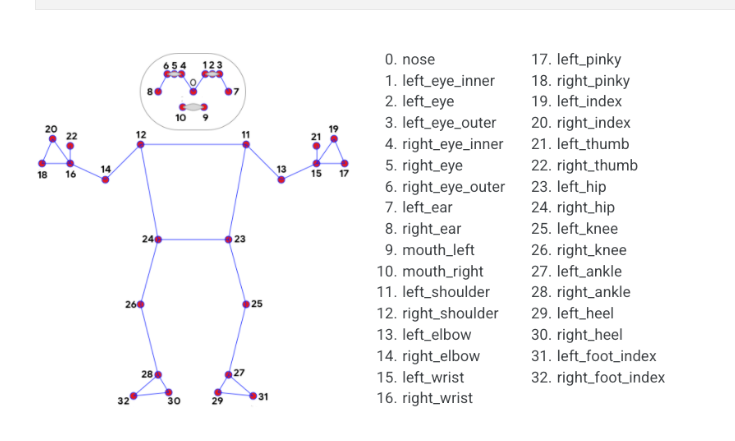

# 3. Loading Training And Testing Datasets

In [7]:
import pandas as pd
dataset_test=pd.read_csv('Testing_set.csv');dataset_test.head(5390)#;dataset_test=np.array(dataset_test)
dataset_train=pd.read_csv('Training_set.csv');dataset_train.head(5390)#;dataset_test=pd.read_csv('Testing_set.csv');dataset.head(5390)

,filename,Class
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
5332,Image_5333.jpg,sitting
5333,Image_5334.jpg,sitting
5334,Image_5335.jpg,dancing
5335,Image_5336.jpg,running


# 4.Calculating The Training And Test Datasets Shape

In [8]:
dataset_train.shape

(5337, 2)

In [9]:
dataset_test.shape

(5337, 2)

# 5. Keras Model  Dense Layers Declare and Compile

In [12]:
import keras;from keras import layers#importing Keras liberary
model=keras.Sequential()#Keras Model Declare
model.add(layers.Dense(64,kernel_initializer='uniform',input_shape=(10,10)))#adding dense layers

model.add(layers.Activation('softmax'))#adding softmax activision funct
optimize=keras.optimizers.Adam(learning_rate=0.15)#adams optimizers
model.compile(loss='categorial_crossentropy',optimizer=optimize)#compiling model


# 6.RealTime VideoCapture

In [6]:
# Video Feed
cap = cv2.VideoCapture(0)#capturing Video
while cap.isOpened():
    ret, frame = cap.read()#Camera Input
    cv2.imshow('Body Pose Langauge Detection using CNN', frame)#Printing Video Frame

    if cv2.waitKey(10) & 0xFF == ord('q'):break#Video Capture Exit

cap.release()#VideoCapture Release
cv2.destroyAllWindows()#VideoCapture Collapse

KeyboardInterrupt: 

: 

# 7. Make Detections From Realtime VideoCamera Capture

In [13]:
cap = cv2.VideoCapture(0)#VideoCapturing Initalizing

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:#mediapipe instance Declare
    while cap.isOpened():#Iterating Input Camera
        ret, frame = cap.read() #Input Camera frame declare

        ##Dataset Training##

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)#Dataset Encoding Conversion
        image.flags.writeable = False#intializing Image Attributes for Detection


        results = pose.process(image)#Input Pose detection Processing

 
        image.flags.writeable = True#Feature Image Dataset Points Declare
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)#Feature Dataset Points Decoding 

        try:
            landmarks = results.pose_landmarks.landmark#Dataset's Feature landmark Points Extraction
            print(landmarks)#printing Detected Feature Points with Visiblity Accuracy
        except:pass#goto UserInput to non-detected dataset points


        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )#Drawing Estimated Pose after Body's Feature Points Detection


        cv2.imshow('Body Pose Estimation Using CNN', image)#printing Detected Body Pose with Extracted Feature Points 

        if cv2.waitKey(10) & 0xFF == ord('q'):#Window Exit
            break
    cap.release();cv2.destroyAllWindows()#Collapsing VideoCapture Input window

[x: 0.5847771
y: 0.80479485
z: -0.75798166
visibility: 0.8915419
, x: 0.6022065
y: 0.7544533
z: -0.6951747
visibility: 0.82579297
, x: 0.6128205
y: 0.7555193
z: -0.6956892
visibility: 0.86703235
, x: 0.62273085
y: 0.75729156
z: -0.69583833
visibility: 0.8149786
, x: 0.5643046
y: 0.75316185
z: -0.74741364
visibility: 0.85964286
, x: 0.5488585
y: 0.75349987
z: -0.74767977
visibility: 0.9076396
, x: 0.5345626
y: 0.7543887
z: -0.74852616
visibility: 0.8896564
, x: 0.617484
y: 0.7822422
z: -0.33383477
visibility: 0.8416838
, x: 0.4990986
y: 0.77461433
z: -0.5508408
visibility: 0.9177358
, x: 0.5946737
y: 0.85970217
z: -0.61587965
visibility: 0.8242834
, x: 0.5506654
y: 0.85602075
z: -0.67957366
visibility: 0.890187
, x: 0.66163635
y: 1.0319703
z: -0.029872019
visibility: 0.8049814
, x: 0.40481955
y: 1.0249215
z: -0.4843789
visibility: 0.9233668
, x: 0.7446761
y: 1.2736526
z: 0.07787477
visibility: 0.030581817
, x: 0.29027689
y: 1.3798068
z: -0.5977491
visibility: 0.2004425
, x: 0.71762735
y

KeyboardInterrupt: 

: 

# 8. Graph Plotting

In [1]:
landmarks=res.pose_landmarks.landmark#Extracting Landmarks

x=[landmark.x for landmark in landmarks]#Get X Coordinate values for each landmark Points
y=[landmarks.y for landmark in landmarks]#Get Y Coordinate values for each landmark Points

plt.scatter(x,y)#Creating a Scatter Plot of Each Landmarks
plt.title("Body Pose Estimation")#Plotting Title and 
plt.xlabel("X")#Labelling X Coordinate
plt.ylabel("Y")#Labelling Y Coordinate

plt.show()#Plotting

NameError: name 'res' is not defined